In [6]:
import numpy as np
from pandas import to_datetime
from cartopy import crs as ccrs
from cartopy import feature as cfeature
import matplotlib as mpl
import matplotlib.pyplot as plt
# mpl.rcParams['font.family'] = 'Myriad Pro'
# mpl.rcParams['font.size'] = 9

import proplot as pplt
pplt.rc["font.sans-serif"] = "Myriad Pro"
pplt.rc["font.size"] = 9
pplt.rc["font.largesize"] = "large"
pplt.rc["colorbar.width"] = 0.1
pplt.rc["savefig.dpi"] = 200

In [4]:
datanm = 'spimv2'

lon = np.load('0data/{}_lon.npy'.format(datanm))
lat = np.load('0data/{}_lat.npy'.format(datanm))
latlon = np.load('0data/{}_latlon.npy'.format(datanm))
ddate = to_datetime(np.load('0data/{}_date.npy'.format(datanm)))
NY = ddate.year.max() - ddate.year.min() + 1
vp = 1 - np.load("0data/prcp_validpoint_annual_100.npy")


def plot_base(draw_labels=True):
    fig, ax = pplt.subplots(ncols=2, nrows=1, figwidth=9, tight=True, proj=ccrs.Robinson(central_longitude=180), #central_longitude=180
                            )
    # fig, ax = plt.subplots(1, 2, figsize=(9, 4), subplot_kw={'projection': ccrs.Robinson()})
    for ax0 in ax:
        ax0.coastlines()
        gl = ax0.gridlines(draw_labels=draw_labels, linestyle=":", linewidth=0.3, color='k', x_inline=False, y_inline=False)
        gl.right_labels = False
        gl.top_labels = False
        ax0.add_feature(cfeature.BORDERS, facecolor='None', edgecolor='black', ls='--')
        ax0.set_extent([-180, 180, -60, 90], ccrs.PlateCarree())
        ax0.set_xlim(ax0.projection.x_limits)
    # ax.set_extent([-180, 180, lat.min(), lat.max()], crs=ccrs.PlateCarree())
    return fig, ax

/home/hmwang-cli/.conda/envs/STC3d/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "
/home/hmwang-cli/.conda/envs/STC3d/lib/python3.8/site-packages/cartopy/mpl/geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "


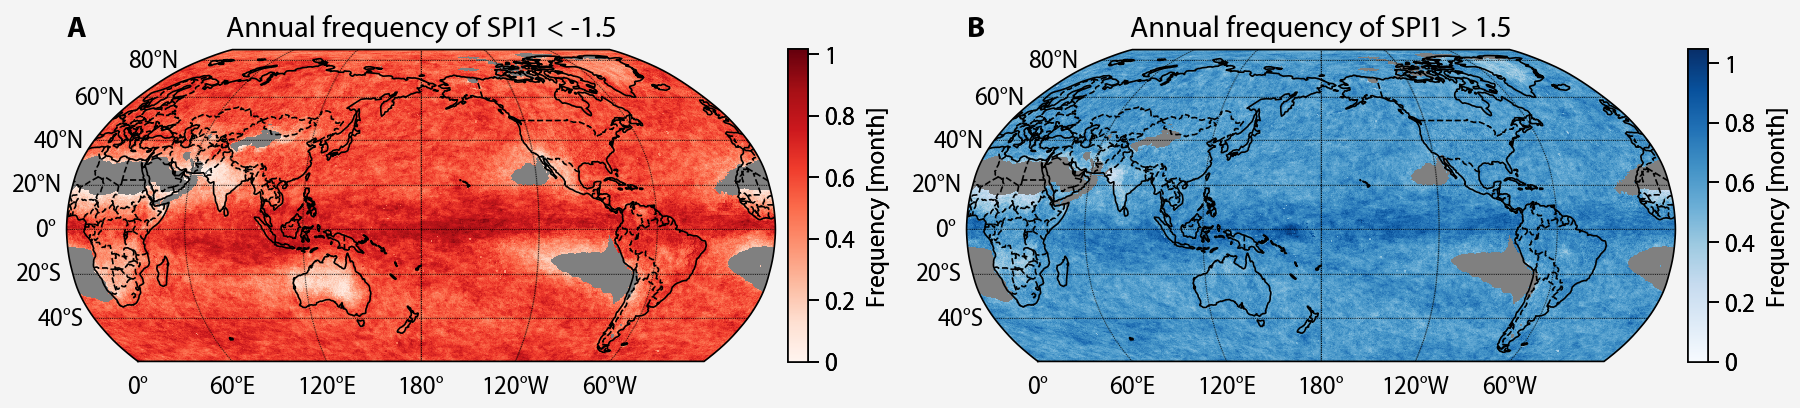

In [7]:
fig, ax = plot_base(draw_labels=True)
# %% plot event numbers
for th in [-1.5]:
    ev = np.load("1event/{}_glb_spi1_event_drt{}.npz".format(datanm, th))['ev']
    cmax = None  # cmaxs[th]
    # monthly
    ev_yrcount = (ev.sum(axis=1) / NY).reshape(lat.size, lon.size)
    ev_yrcount[vp.astype("bool")] = -1
    # ev_yrcount[ev_yrcount < 1/NY] = np.nan
    cmap = mpl.cm.Reds.copy()
    cmap.set_under(color=[0.5, 0.5, 0.5])
    # cmap.set_bad(color=[0.5, 0.5, 0.5])
    cs = ax[0].pcolormesh(lon, lat, ev_yrcount, transform=ccrs.PlateCarree(), shading='auto', discrete=False,
                          cmap=cmap, norm_kw={"vmin": 0, "vmax": cmax}, rasterized=True)
    # cs = ax[0].pcolormesh(lon, lat, ev_yrcount, transform=ccrs.PlateCarree(), shading='auto',
    #                       cmap=cmap, norm=mpl.colors.Normalize(vmin=0, vmax=cmax), rasterized=True)
    ax[0].set(title="Annual frequency of SPI1 < {}".format(th))
    ax[0].colorbar(cs, label="Frequency [month]")
    # fig.colorbar(cs, fraction=0.05, pad=0.2, label="Frequency [month]", ax=ax[0])

for th in [1.5]:
    ev = np.load("1event/{}_glb_spi1_event_fld{}.npz".format(datanm, th))['ev']
    cmax = None  # cmaxs[th]
    # monthly
    ev_yrcount = (ev.sum(axis=1) / NY).reshape(lat.size, lon.size)
    ev_yrcount[vp.astype("bool")] = -1
    # ev_yrcount[ev_yrcount < 1/NY] = np.nan
    cmap = mpl.cm.Blues.copy()
    cmap.set_under(color=[0.5, 0.5, 0.5])
    # cmap.set_bad(color=[0.5, 0.5, 0.5])
    # fig, ax = plot_base()
    cs = ax[1].pcolormesh(lon, lat, ev_yrcount, transform=ccrs.PlateCarree(), shading='auto', discrete=False, 
                          cmap=cmap, norm_kw={"vmin": 0, "vmax": cmax}, rasterized=True)
    # ax.contour(lon, lat, vp, levels=[0.5, 1.5], colors=[[0.3, 0.3, 0.3]], linewidths=0.8, transform=ccrs.PlateCarree())
    ax[1].set(title="Annual frequency of SPI1 > {}".format(th))
    ax[1].colorbar(cs, label="Frequency [month]")
    # fig.savefig("pics/event/{}_glb_spi1_evcount_fld{}.png".format(datanm, th), dpi=300, bbox_inches='tight')

ax.format(abc="A")
fig.savefig("pics/event/{}_glb_spi1_evcount_{}.pdf".format(datanm, th), bbox_inches='tight')